<a href="https://colab.research.google.com/github/Rebecca-202211/Prediction-of-quality-of-Wine/blob/main/Red_Wine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
data = pd.read_csv(url)

In [ ]:
data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Columns:
*   fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

*   volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

*   citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

*   residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

*   chlorides: the amount of salt in the wine

*   free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

*   total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

*   density: the density of water is close to that of water depending on the percent alcohol and sugar content

*   pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

*   sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels

*   alcohol: the percent alcohol content of the wine

*   quality: output variable (based on sensory data, score between 0 and 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **Data Distribution**

<ipython-input-69-f036c13f24e3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], ax=ax)
<ipython-input-69-f036c13f24e3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], ax=ax)
<ipython-input-69-f036c13f24e3>:9: UserWarning: 

`distplot` is a deprecated function and will be remo

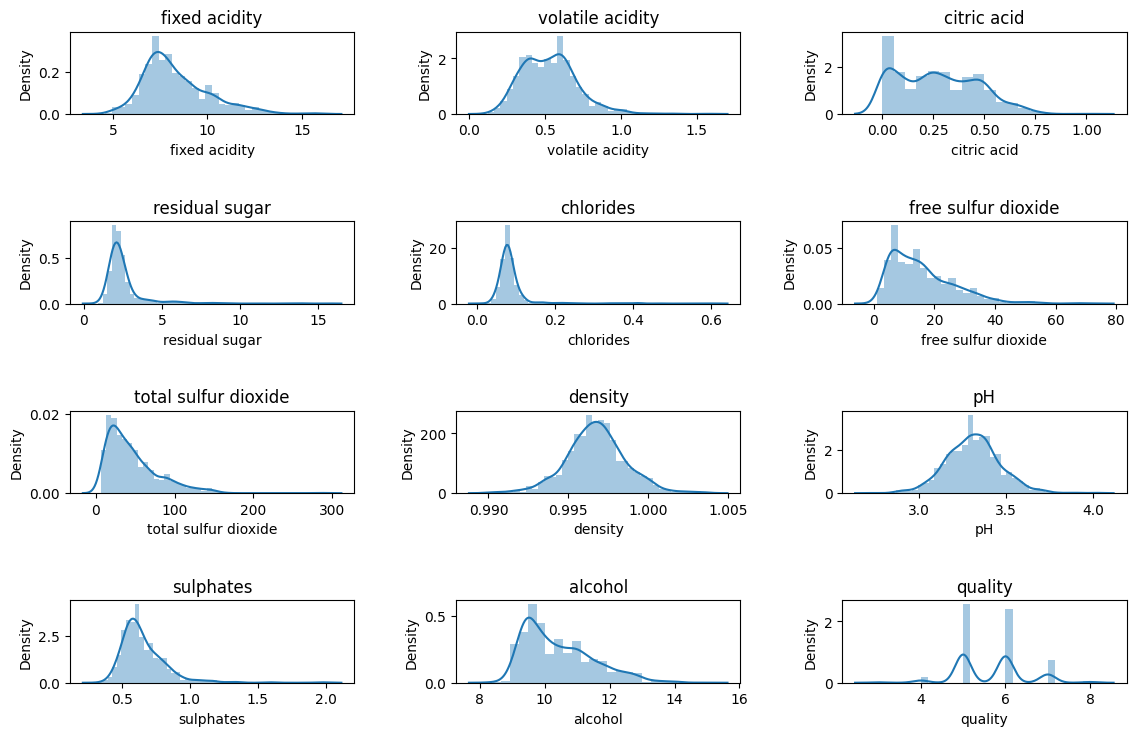

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

a = list(data.columns)
data_with_index = data.reset_index()

fig, axes = plt.subplots(4, 3, figsize=(12, 8))
for i, ax in zip(a,axes.flatten()):
  sns.distplot(data[i], ax=ax)
  ax.set_title(i)

plt.tight_layout(pad = 3)

<Figure size 800x600 with 0 Axes>

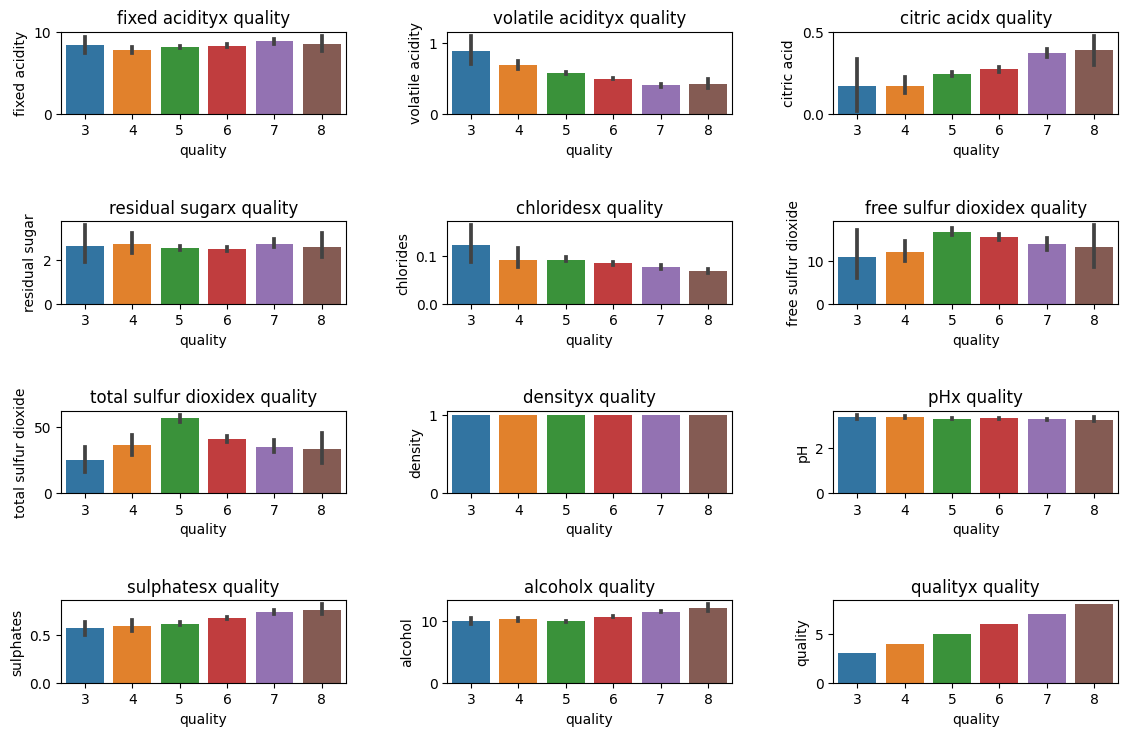

In [ ]:
fig = plt.figure(figsize = (8,6))

fig, axes = plt.subplots(4, 3, figsize=(12,8))
for i, ax in zip(a,axes.flatten()):
  sns.barplot(x = 'quality', y = i, data = data, ax= ax)
  ax.set_title(i+'x quality')

plt.tight_layout(pad = 3)

# **Data Cleaning**

In [ ]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
# Transforming 'quality' data
bins = (0, 6.5, 10)
group = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group)
data['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['quality'] = label_encoder.fit_transform(data['quality'])
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# **Train and Test Model**

In [ ]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)

print('classification_report: \n' + classification_report(y_test, pred_y))
accuracy = accuracy_score(y_test, pred_y)
print('accuracy score: '+ str(accuracy))

classification_report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

accuracy score: 0.9


In [ ]:
scores = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross Validation Scores: [0.8828125  0.9140625  0.8671875  0.9296875  0.90980392]
Average Score: 0.9007107843137255


In [116]:
#分類
#svc
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred_SVC = model.predict(X_test)

#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_DT = model.predict(X_test)

#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
y_pred_RF = model.predict(X_test)

def ac(a):
  accuracy = accuracy_score(y_test, a)
  return str(accuracy)

#integrate
result = pd.DataFrame({'SVC': [ac(y_pred_SVC)], 'DecisionTree': [ac(y_pred_DT)], 'RandomForest':[ac(y_pred_RF)]})
result

SVC DecisionTree RandomForest
0  0.85625     0.871875          0.9